In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('Hitters.csv')

In [3]:
df_hitters = data.copy()
df_hitters

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


#### The salary column is our target variable because we're going to use it to predict a baseball player's salary based on the rest of the features

In [4]:
# Categorical variables

print('League types:', df_hitters['League'].unique())
print('Division types:', df_hitters['Division'].unique())
print('New Leauge Options:', df_hitters['NewLeague'].unique())

League types: ['A' 'N']
Division types: ['E' 'W']
New Leauge Options: ['A' 'N']


In [5]:
#convert categorical variables above into 0s and 1s
df_hitters_num = pd.get_dummies(df_hitters, columns = ['League', 'Division', 'NewLeague'], drop_first = True)
df_hitters_num

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN,0,0,0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,700.0,1,0,1
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,875.0,0,0,0
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,385.0,0,1,0
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,960.0,0,0,0


In [6]:
#check if there are null values in dataset
df_hitters_num.isnull().sum()

AtBat           0
Hits            0
HmRun           0
Runs            0
RBI             0
Walks           0
Years           0
CAtBat          0
CHits           0
CHmRun          0
CRuns           0
CRBI            0
CWalks          0
PutOuts         0
Assists         0
Errors          0
Salary         59
League_N        0
Division_W      0
NewLeague_N     0
dtype: int64

In [7]:
# drop nan values so we can fill it with predicted values later
df_hitters_num_nonull = df_hitters_num.dropna()
df_hitters_num_nonull.isnull().sum()

AtBat          0
Hits           0
HmRun          0
Runs           0
RBI            0
Walks          0
Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
PutOuts        0
Assists        0
Errors         0
Salary         0
League_N       0
Division_W     0
NewLeague_N    0
dtype: int64

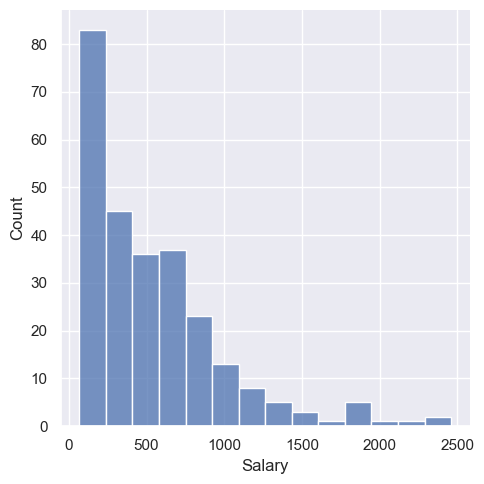

In [8]:
sns.displot(df_hitters_num_nonull['Salary']);

#### Note the outliers which are > 1500+. These are the Messis and CR7s of the Baseball world. For the predictive model though, the majority of values will be <1500. 

In [9]:
#check for linear relationship between 'Salary' and the independent variables in the dataset.

correlation = df_hitters_num_nonull.corr()
correlation['Salary'].sort_values(ascending=True)

Division_W    -0.192514
League_N      -0.014282
Errors        -0.005401
NewLeague_N   -0.002834
Assists        0.025436
PutOuts        0.300480
HmRun          0.343028
AtBat          0.394771
Years          0.400657
Runs           0.419859
Hits           0.438675
Walks          0.443867
RBI            0.449457
CWalks         0.489822
CHmRun         0.524931
CAtBat         0.526135
CHits          0.548910
CRuns          0.562678
CRBI           0.566966
Salary         1.000000
Name: Salary, dtype: float64

#### Usually values closer to 1 have a stronger positive correlation. From above we can assume that values > 0.4 have a positive correlation to our target variable, 'Salary'

In [10]:
#declare dependent and independent variables

X = df_hitters_num_nonull.drop('Salary', axis=1)
y = df_hitters_num_nonull['Salary']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=365)

In [12]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
#perform linear regression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [14]:
print("Linear Regression coefficients: ", lin_reg.coef_)
print("Linear Regression y-intercept: ", lin_reg.intercept_)

Linear Regression coefficients:  [-216.58725574  176.6665394    26.42174341  -32.30723397    3.50396442
  114.47871878  -38.27993316 -900.68020534  836.55817419   28.55520441
  405.6848943    64.99526588 -187.22476547  115.53995185   68.62131273
  -13.90111177   58.90973857  -81.77905186  -35.02755069]
Linear Regression y-intercept:  532.2961176470588


In [15]:
lin_reg_y_predicted = lin_reg.predict(X_test)
lin_reg_y_predicted

array([ 415.45782829,  432.20780272,  758.78349674,  799.00336712,
        350.20586478,  294.0659682 ,  184.24872446,  464.67402835,
       1108.05429466,  556.19984654,  488.06923001,  473.30471499,
        839.99519038,  751.59519044,  220.43742205,  320.16591592,
        340.14473675,  710.61012663,  170.8874789 ,  651.78620649,
        827.41281464,  196.71008612,  573.1185691 , 1172.76382687,
       1282.0883485 , 1594.28681356,  777.07655701, 1094.24965368,
        556.76207246, 1107.0708847 ,  477.61394579,  297.87571483,
        361.26177051,  503.18848321,  189.99424369,  241.50466799,
        248.98173212,  942.76631923,  617.30294655,  225.25956752,
        323.42092736,  455.93050456,  871.9585369 ,  379.23514877,
        620.49084963,  281.78622042,  566.78476943,  589.94187243,
        662.63913511,  545.01484672, 2012.42953081,  737.55139652,
        380.02427287,  443.3775693 , 1076.912394  ,  710.95238727,
        556.2946056 ,   68.23384264,  209.15575371,  195.57359

In [16]:
lin_comp = pd.DataFrame({'Predicted': lin_reg_y_predicted, 'Actual': y_test})
lin_comp

,Predicted,Actual
14,415.457828,240.0
181,432.207803,737.5
177,758.783497,1300.0
124,799.003367,737.5
277,350.205865,475.0
...,...,...
303,422.501932,425.0
264,383.905451,250.0
31,115.778511,110.0
204,315.352309,780.0


In [17]:
# Perform ridge regression

cv =RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

In [18]:
ridge = RidgeCV(alphas=np.arange(0.1, 15, 0.1), cv=cv, scoring='neg_mean_absolute_error')

In [19]:
ridge.fit(X_train,y_train)
ridge_reg_y_pred = ridge.predict(X_test)

print("Ridge tuning parameter:", (ridge.alpha_))
print("Ridge model coefficients:", (ridge.coef_))
print("Ridge model intercept:", (ridge.intercept_))

Ridge tuning parameter: 14.9
Ridge model coefficients: [-71.42640168  71.8110701   -3.91461679  23.43839582  19.73244936
  57.61005425 -43.13185694   9.84504751 107.01926838  24.58029082
 104.54751478  82.0986956  -75.31370334 113.40819344  26.44649493
  -8.50001793  34.29878003 -78.98070629 -17.62606204]
Ridge model intercept: 532.2961176470588


In [20]:
#further estimate performance using specific metrics i.e mse, rmse

print("Linear Regression Model RMSE: ", math.sqrt(mean_squared_error(y_test, lin_reg_y_predicted)))
print("Linear Regression Model Training Score: ", lin_reg.score(X_train, y_train))
print("Linear Regresion Model Testing Score: ", lin_reg.score(X_test, y_test))

Linear Regression Model RMSE:  313.2395678994062
Linear Regression Model Training Score:  0.5680589160518967
Linear Regresion Model Testing Score:  0.3455994829736333


In [21]:
ridge.fit(x_train,y_train)

NameError: name 'x_train' is not defined

In [ ]:
# check for multicolinearity
plt.figure(figsize =(13,6))
sns.heatmap(df_hitters.corr(numeric_only = True),
           vmin= -1,
           vmax= 1,
           cmap='GnBu',
           annot=True)

plt.show()